In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error


pd.set_option('display.max_columns',20)

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [222]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [66]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
numerical = train_df.loc[:,train_df.dtypes == 'object']
objects = train_df.select_dtypes('object')

# Check for outliers

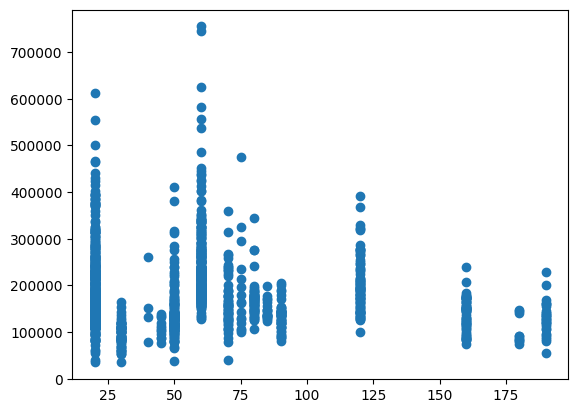

In [ ]:
plt.scatter(x = 'MSSubClass', y = 'SalePrice', data=train_df)

In [78]:
train_df.query('SalePrice>700000 & MSSubClass < 75')
# 692, 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


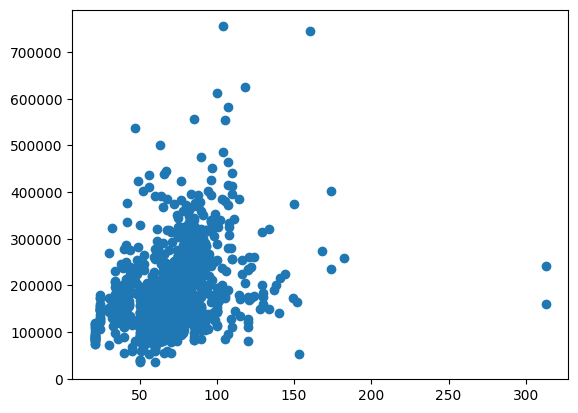

In [54]:
plt.scatter(x = 'LotFrontage', y = 'SalePrice', data=train_df)


In [64]:
train_df.query('LotFrontage > 200')
# 935, 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [67]:
stats.zscore(train_df['LotFrontage'],nan_policy='omit').sort_values()[1196:1201]

231      4.282249
197      4.282249
1127     4.611811
934     10.008389
1298    10.008389
Name: LotFrontage, dtype: float64

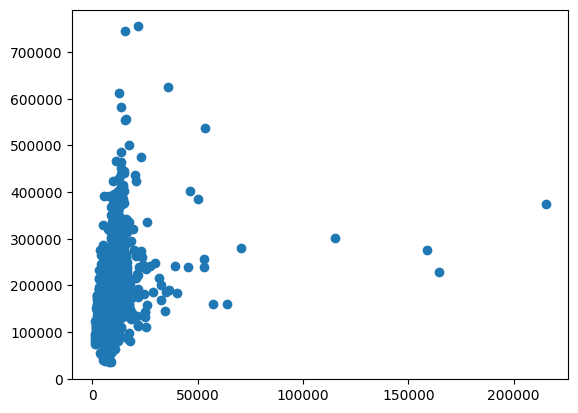

In [56]:
plt.scatter(x = 'LotArea', y = 'SalePrice', data=train_df)


In [137]:
train_df.query('LotArea > 150000')
# 250, 314,336 maybe 707

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950


In [68]:
stats.zscore(train_df['LotArea']).sort_values().tail()

451     6.037793
706    10.486449
249    14.881285
335    15.448542
313    20.518273
Name: LotArea, dtype: float64

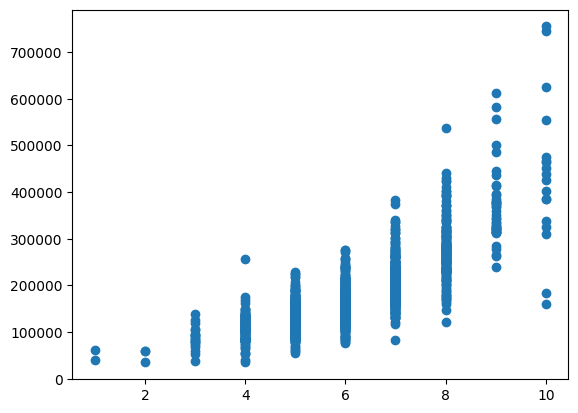

In [69]:
plt.scatter(x = 'OverallQual', y = 'SalePrice', data=train_df)

In [70]:
train_df.query('SalePrice < 300000 & OverallQual ==10')
# 524

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


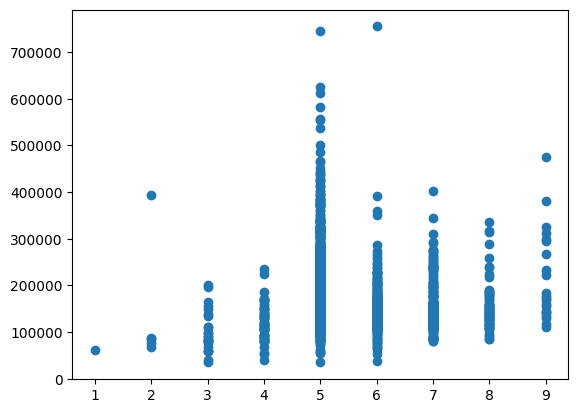

In [72]:
plt.scatter(x = 'OverallCond', y = 'SalePrice', data=train_df)

In [76]:
train_df.query('OverallCond == 6 & SalePrice >650000')
#379

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


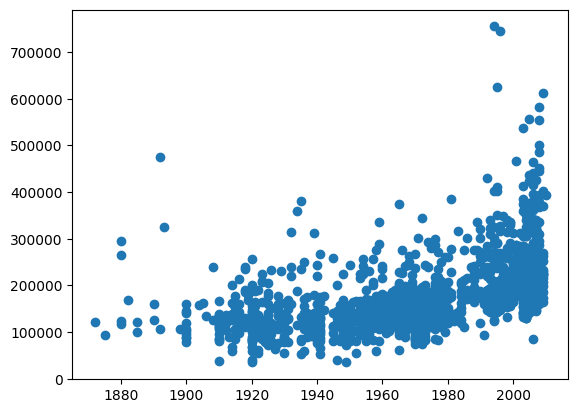

In [77]:
plt.scatter(x = 'YearBuilt', y = 'SalePrice', data=train_df)

In [ ]:
train_df.query('SalePrice > 400000 & YearBuilt< 1900')
# 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


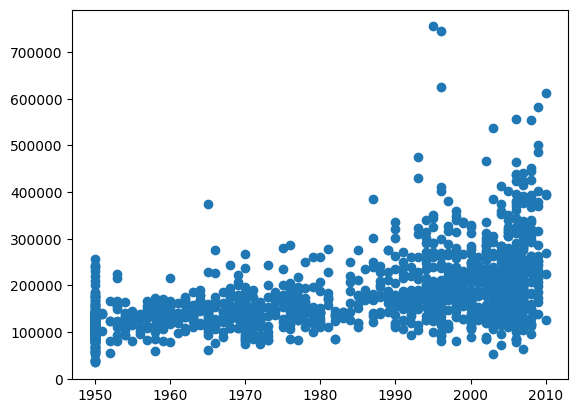

In [82]:
plt.scatter(x = 'YearRemodAdd', y = 'SalePrice', data=train_df)

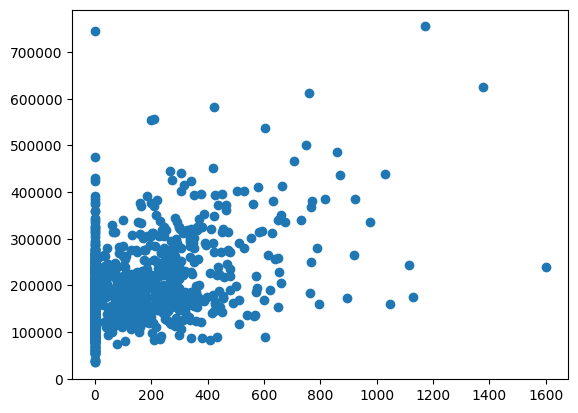

In [84]:
plt.scatter(x = 'MasVnrArea', y = 'SalePrice', data=train_df)

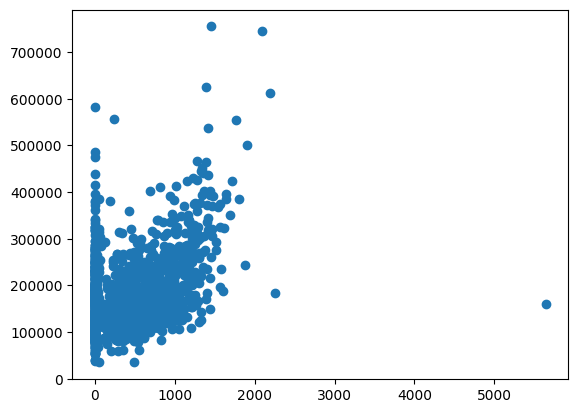

In [86]:
plt.scatter(x = 'BsmtFinSF1', y = 'SalePrice', data=train_df)

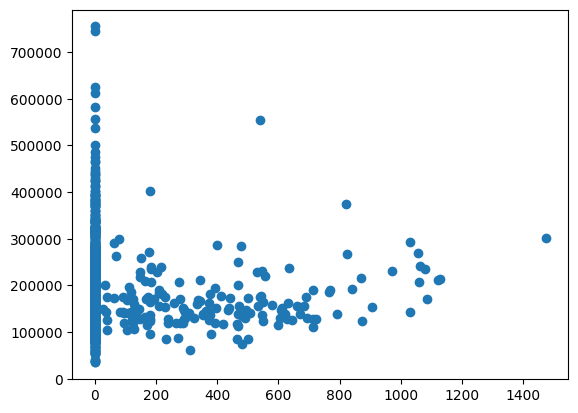

In [88]:
plt.scatter(x = 'BsmtFinSF2', y = 'SalePrice', data=train_df)

In [ ]:
train_df.query('BsmtFinSF2 >400 & SalePrice > 500000')
# 441

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


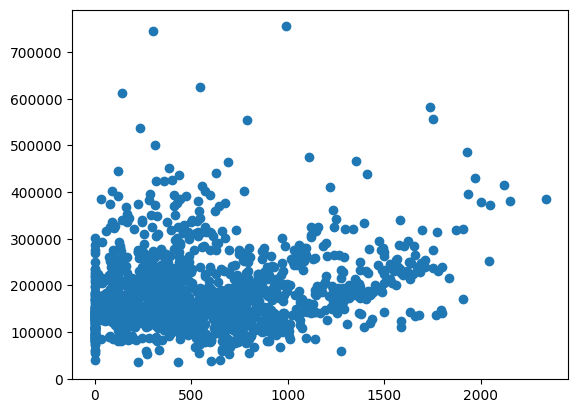

In [91]:
plt.scatter(x = 'BsmtUnfSF', y = 'SalePrice', data=train_df)

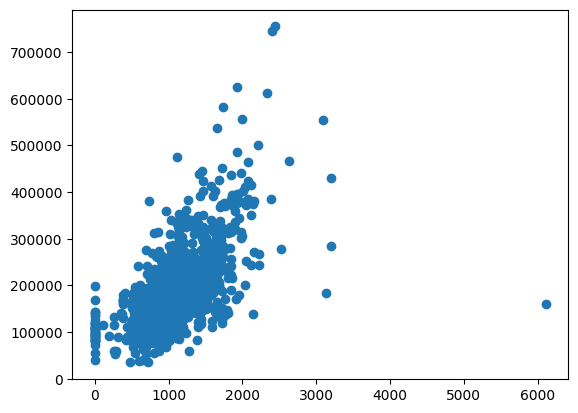

In [92]:
plt.scatter(x = 'TotalBsmtSF', y = 'SalePrice', data=train_df)

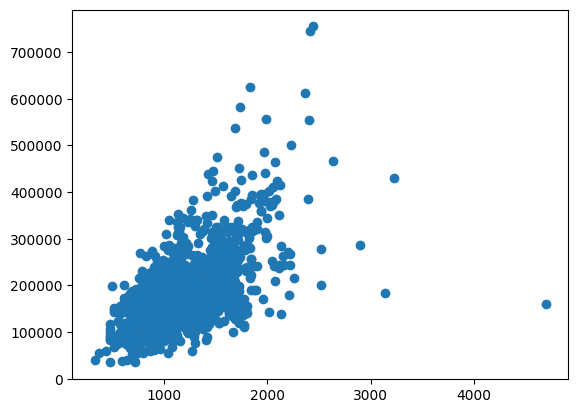

In [94]:
plt.scatter(x = '1stFlrSF', y = 'SalePrice', data=train_df)

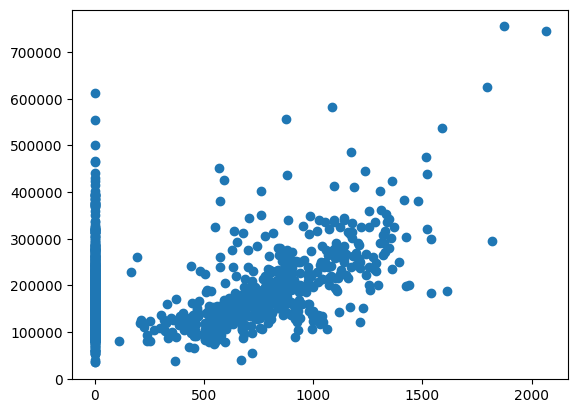

In [95]:
plt.scatter(x = '2ndFlrSF', y = 'SalePrice', data=train_df)

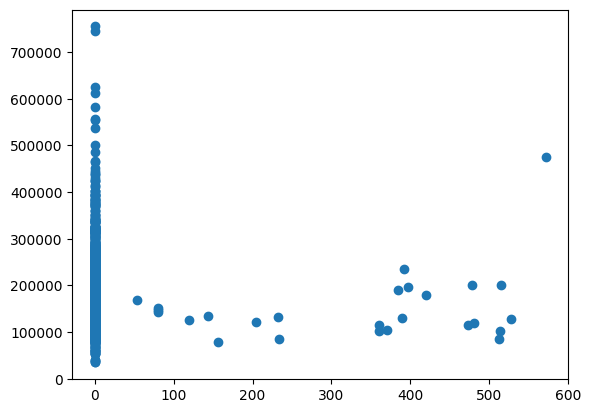

In [98]:
plt.scatter(x = 'LowQualFinSF', y = 'SalePrice', data=train_df)
# To be dropped

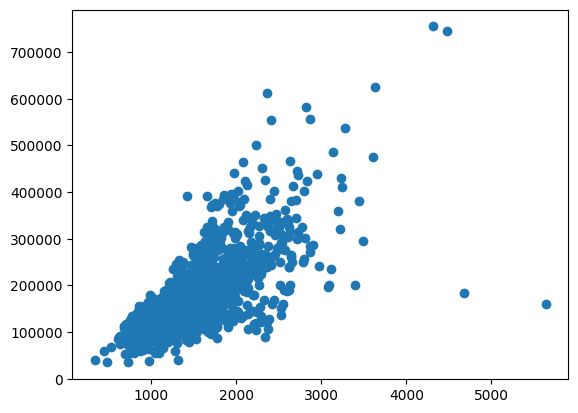

In [100]:
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data=train_df)

In [101]:
train_df.query('GrLivArea > 4000 & SalePrice < 300000')
#524

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


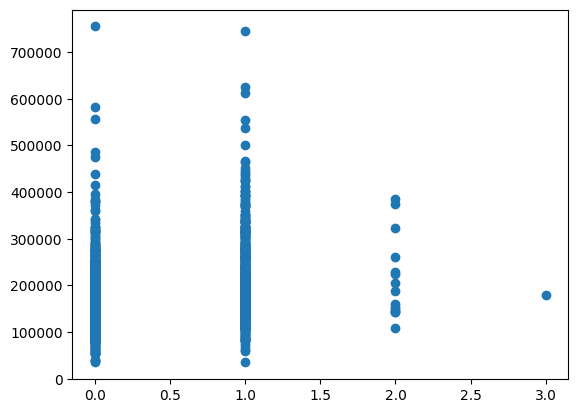

In [102]:
plt.scatter(x = 'BsmtFullBath', y = 'SalePrice', data=train_df)

In [103]:
train_df.query('BsmtFullBath > 2 & SalePrice < 300000')
#739

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


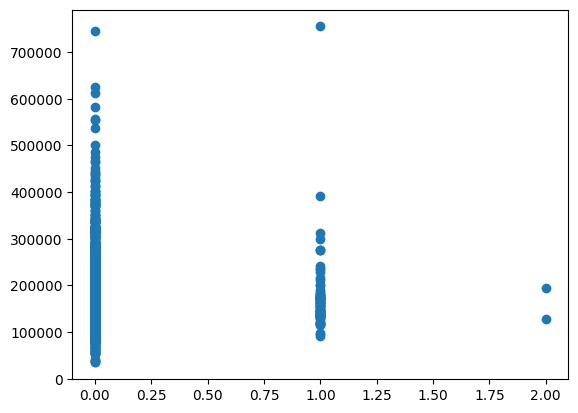

In [104]:
plt.scatter(x = 'BsmtHalfBath', y = 'SalePrice', data=train_df)

In [140]:
train_df.query('BsmtHalfBath==2')
# 598,955

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


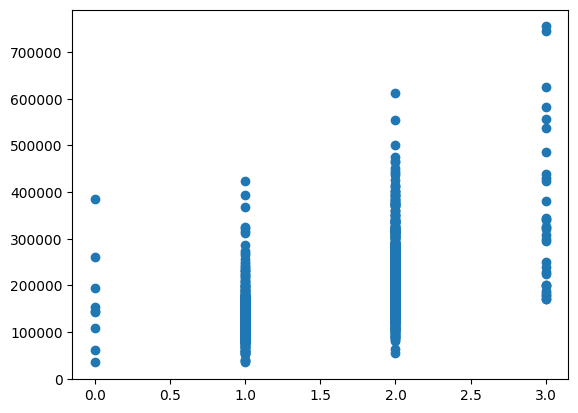

In [105]:
plt.scatter(x = 'FullBath', y = 'SalePrice', data=train_df)

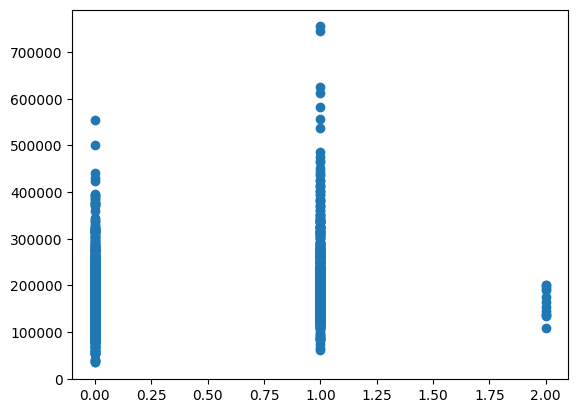

In [106]:
plt.scatter(x = 'HalfBath', y = 'SalePrice', data=train_df)

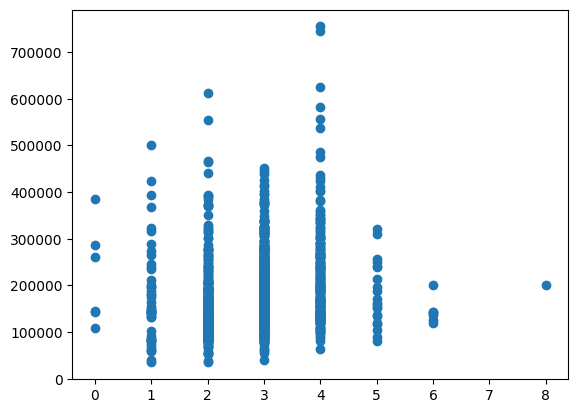

In [107]:
plt.scatter(x = 'BedroomAbvGr', y = 'SalePrice', data=train_df)

In [108]:
train_df.query('BedroomAbvGr ==8')
#636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


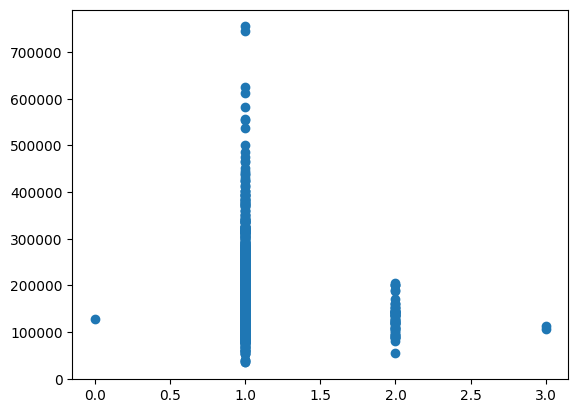

In [109]:
plt.scatter(x = 'KitchenAbvGr', y = 'SalePrice', data=train_df)

In [110]:
train_df.query('KitchenAbvGr == 3')
#maybe 49,810

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000


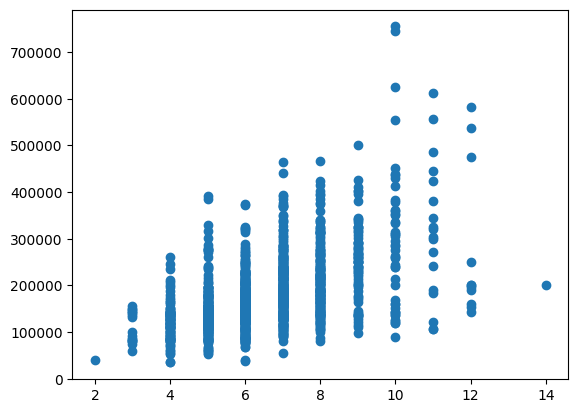

In [111]:
plt.scatter(x = 'TotRmsAbvGrd', y = 'SalePrice', data=train_df)

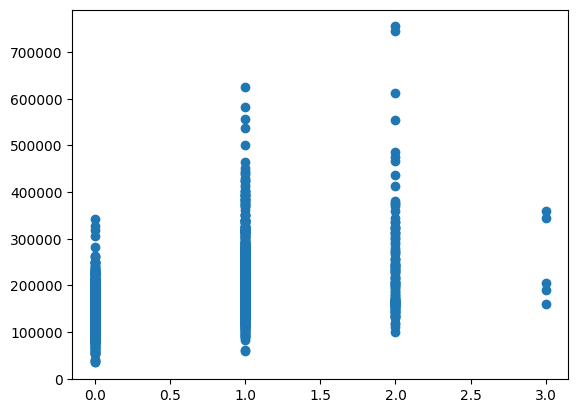

In [113]:
plt.scatter(x = 'Fireplaces', y = 'SalePrice', data=train_df)

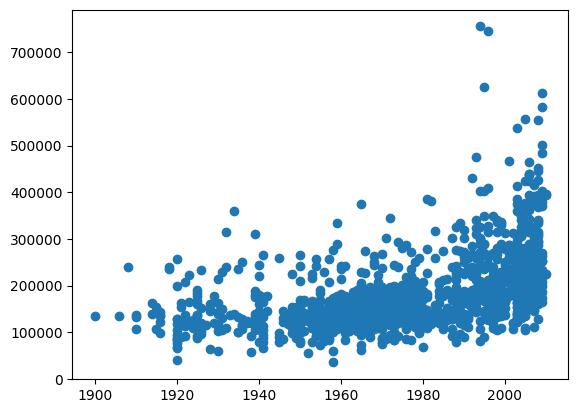

In [114]:
plt.scatter(x = 'GarageYrBlt', y = 'SalePrice', data=train_df)

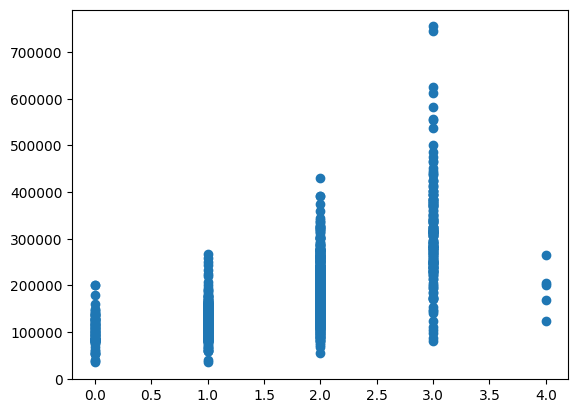

In [115]:
plt.scatter(x = 'GarageCars', y = 'SalePrice', data=train_df)

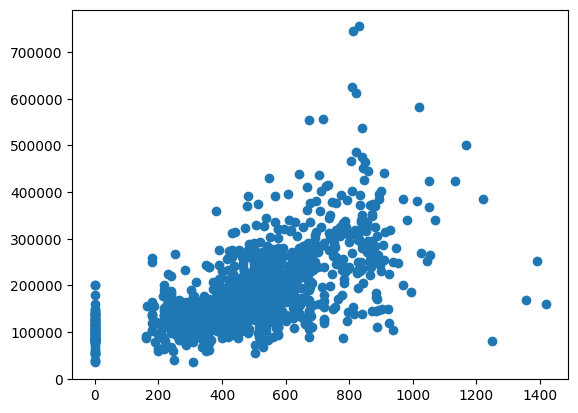

In [116]:
plt.scatter(x = 'GarageArea', y = 'SalePrice', data=train_df)

In [117]:
train_df.query('GarageArea > 1200 & SalePrice < 300000')
# maybe 582,1062, 1191

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


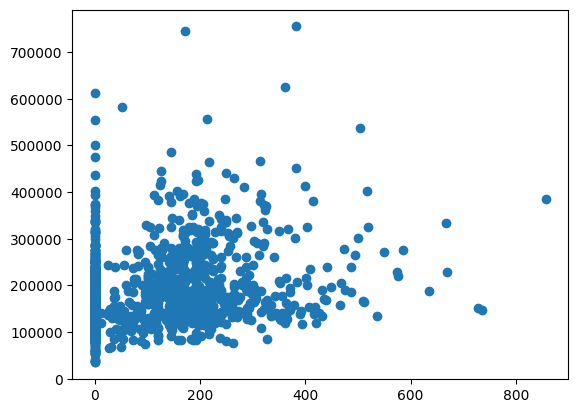

In [118]:
plt.scatter(x = 'WoodDeckSF', y = 'SalePrice', data=train_df)

In [ ]:
train_df.query('WoodDeckSF < 100 & SalePrice > 570000 & WoodDeckSF > 0')
# 804

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933


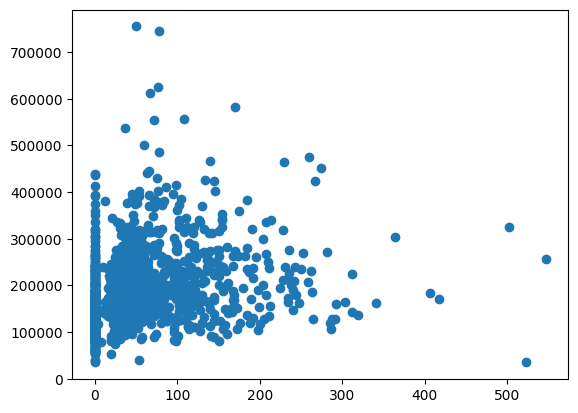

In [125]:
plt.scatter(x = 'OpenPorchSF', y = 'SalePrice', data=train_df)

In [128]:
train_df.query('OpenPorchSF > 450 & SalePrice < 100000')
# 496

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900


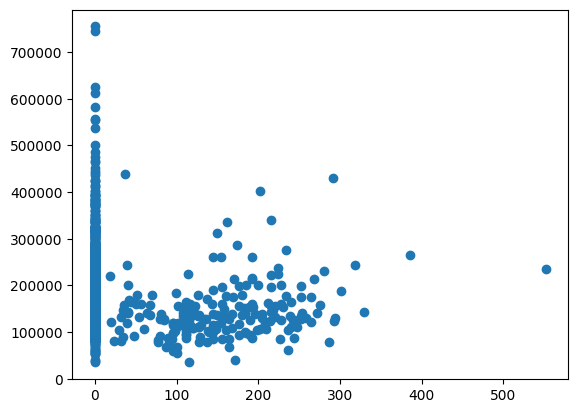

In [129]:
plt.scatter(x = 'EnclosedPorch', y = 'SalePrice', data=train_df)

In [130]:
train_df.query('EnclosedPorch > 400')
# 198

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


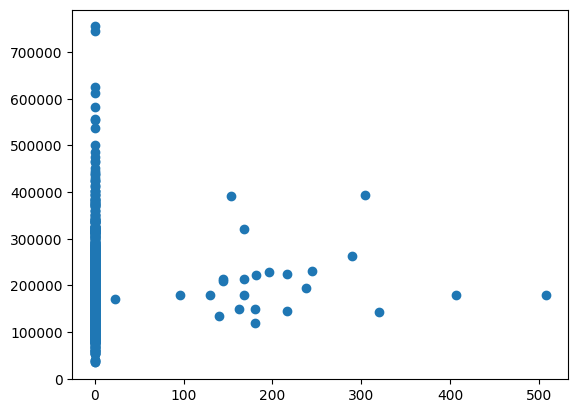

In [131]:
plt.scatter(x = '3SsnPorch', y = 'SalePrice', data=train_df)
# To be dropped

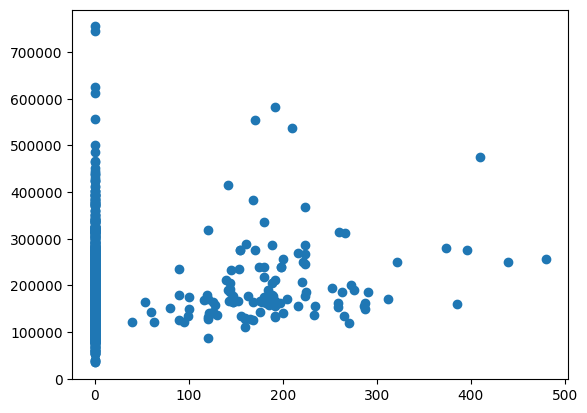

In [132]:
plt.scatter(x = 'ScreenPorch', y = 'SalePrice', data=train_df)

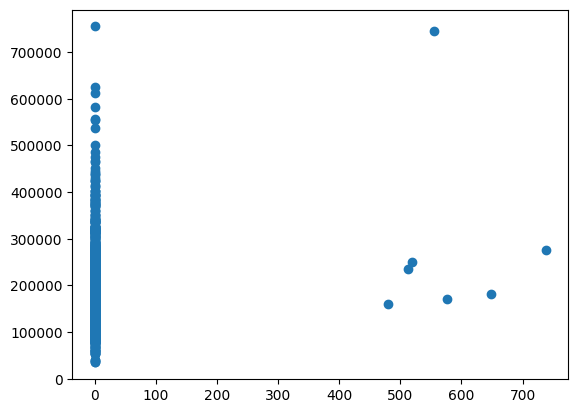

In [133]:
plt.scatter(x = 'PoolArea', y = 'SalePrice', data=train_df)
# To be dropped

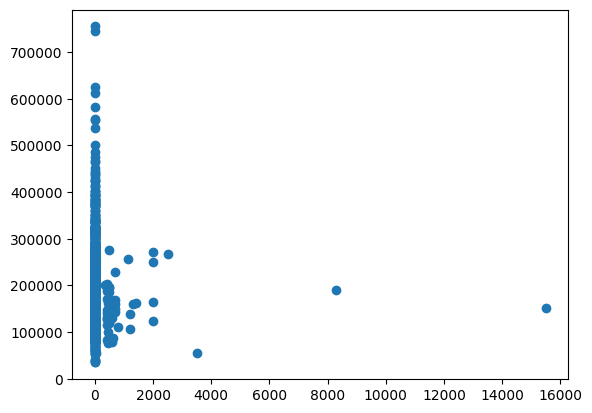

In [134]:
plt.scatter(x = 'MiscVal', y = 'SalePrice', data=train_df)
# To be dropped

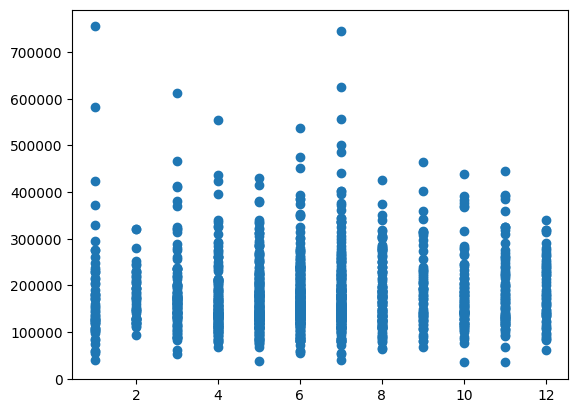

In [135]:
plt.scatter(x = 'MoSold', y = 'SalePrice', data=train_df)

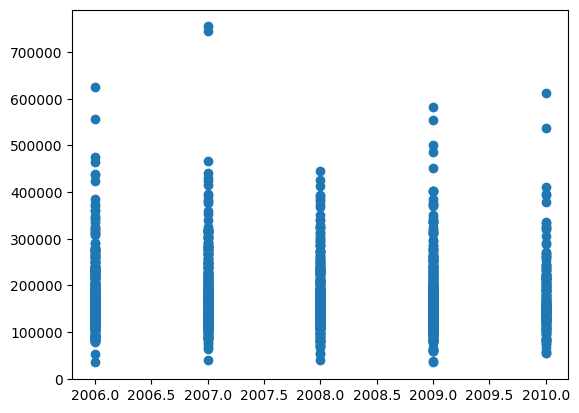

In [136]:
plt.scatter(x = 'YrSold', y = 'SalePrice', data=train_df)

In [224]:
test = [598, 955, 935, 1299, 250, 314, 336, 707, 379, 1183, 692, 186, 441, 186, 524, 739, 598, 955, 636, 1062, 1191, 496, 198, 1338]

In [6]:
outliers = [692,1183,935,1299,250,314,336,955,598,707,524,379,186,441,739,636,804,496,198,1062, 1191,49, 810]

In [7]:
train_df.drop(train_df[train_df.Id.isin(outliers)].index,inplace=True)

# Filling NaN

In [272]:
test_df.isna().sum().sort_values(ascending=False).head(34)

PoolQC          1456
MiscFeature     1408
GarageYrBlt       78
MSZoning           4
BsmtFullBath       2
Utilities          2
Functional         2
BsmtHalfBath       2
Exterior1st        1
BsmtFinSF1         1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior2nd        1
GarageArea         1
GarageCars         1
KitchenQual        1
BsmtFinSF2         1
SaleType           1
BldgType           0
Condition2         0
LandSlope          0
LotConfig          0
Condition1         0
Neighborhood       0
LotFrontage        0
Alley              0
Street             0
LotArea            0
Id                 0
MSSubClass         0
LandContour        0
LotShape           0
BsmtCond           0
BsmtQual           0
dtype: int64

In [271]:
train_df.isna().sum().sort_values(ascending=False).head(21)

PoolQC          1433
MiscFeature     1386
GarageYrBlt       76
MSSubClass         0
LotArea            0
Street             0
MSZoning           0
LotFrontage        0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Alley              0
LotShape           0
Id                 0
HouseStyle         0
BldgType           0
Condition2         0
OverallQual        0
dtype: int64

In [184]:
train_df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [8]:
train_df['Electrical'].fillna('SBrkr',inplace=True)
test_df['Electrical'].fillna('SBrkr',inplace=True)

/tmp/ipykernel_965/2621022521.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Electrical'].fillna('SBrkr',inplace=True)
/tmp/ipykernel_965/2621022521.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

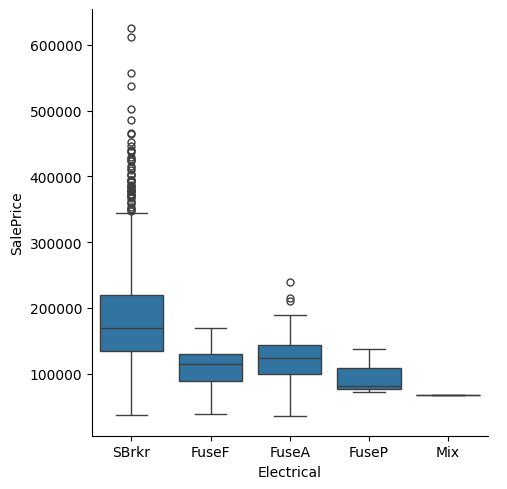

In [230]:
sns.catplot(x='Electrical',y='SalePrice',data=train_df,kind='box')

In [9]:
train_df['MasVnrArea'].fillna(0,inplace=True)
test_df['MasVnrArea'].fillna(0,inplace=True)

/tmp/ipykernel_965/2498760478.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrArea'].fillna(0,inplace=True)
/tmp/ipykernel_965/2498760478.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [195]:
train_df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [10]:
train_df['BsmtFinType1'].fillna('Unf',inplace=True)
test_df['BsmtFinType1'].fillna('Unf',inplace=True)

/tmp/ipykernel_965/1507099269.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtFinType1'].fillna('Unf',inplace=True)
/tmp/ipykernel_965/1507099269.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

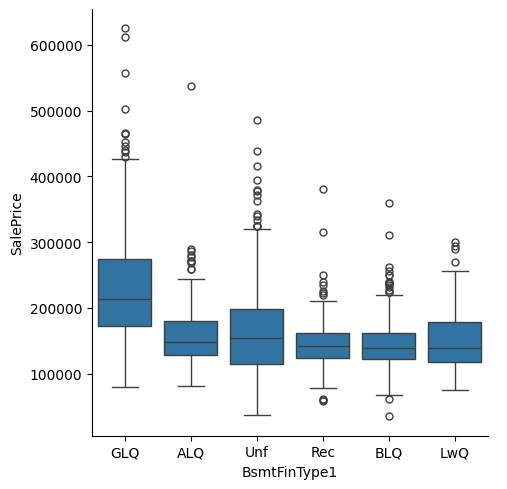

In [206]:
sns.catplot(x='BsmtFinType1',y='SalePrice',data=train_df,kind='box')

In [207]:
train_df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [11]:
train_df['BsmtQual'].fillna('No',inplace=True)
test_df['BsmtQual'].fillna('No',inplace=True)

/tmp/ipykernel_965/3798412020.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtQual'].fillna('No',inplace=True)
/tmp/ipykernel_965/3798412020.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

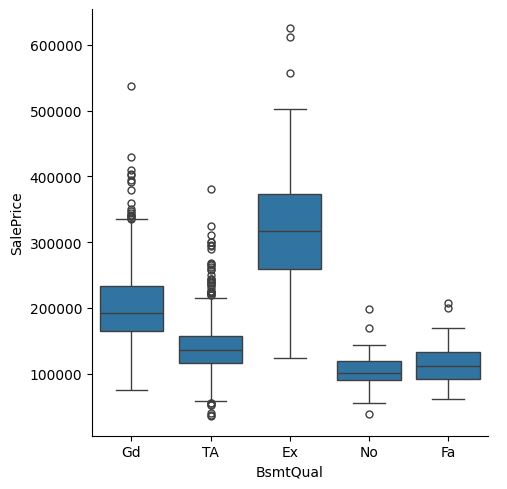

In [210]:
sns.catplot(train_df, x='BsmtQual',y='SalePrice',kind='box')

In [276]:
train_df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}).corr(train_df['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}))

np.float64(0.21197549480145877)

In [212]:
train_df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [12]:
train_df['BsmtCond'].fillna('No',inplace=True)
test_df['BsmtCond'].fillna('No',inplace=True)

/tmp/ipykernel_965/2042814062.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtCond'].fillna('No',inplace=True)
/tmp/ipykernel_965/2042814062.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

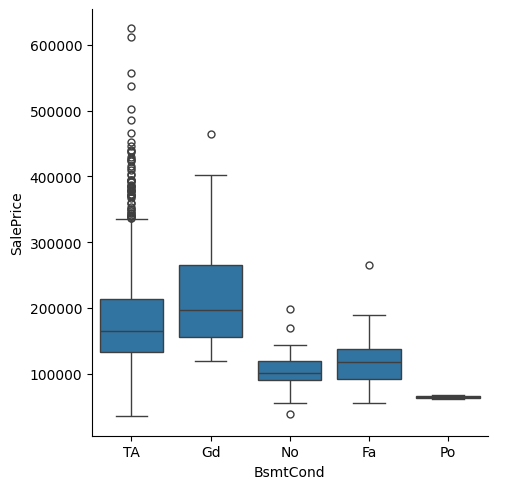

In [214]:
sns.catplot(train_df, x='BsmtCond',y='SalePrice',kind='box')

In [215]:
train_df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [13]:
train_df['BsmtExposure'].fillna('No',inplace=True)
test_df['BsmtExposure'].fillna('No',inplace=True)

/tmp/ipykernel_965/2134669793.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtExposure'].fillna('No',inplace=True)
/tmp/ipykernel_965/2134669793.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

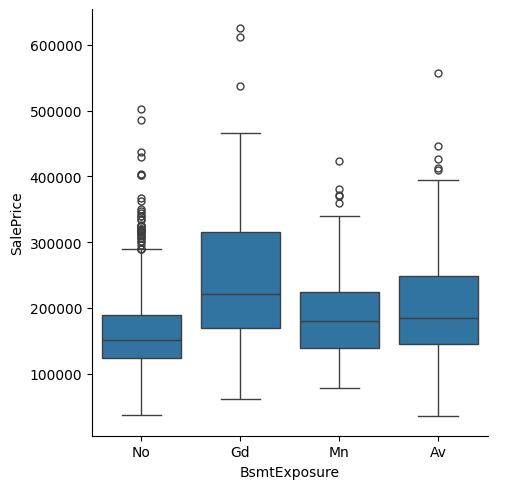

In [217]:
sns.catplot(train_df, x='BsmtExposure',y='SalePrice',kind='box')

In [218]:
train_df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [14]:
train_df['BsmtFinType2'].fillna('Unf',inplace=True)
test_df['BsmtFinType2'].fillna('Unf',inplace=True)

/tmp/ipykernel_965/1235120148.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtFinType2'].fillna('Unf',inplace=True)
/tmp/ipykernel_965/1235120148.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

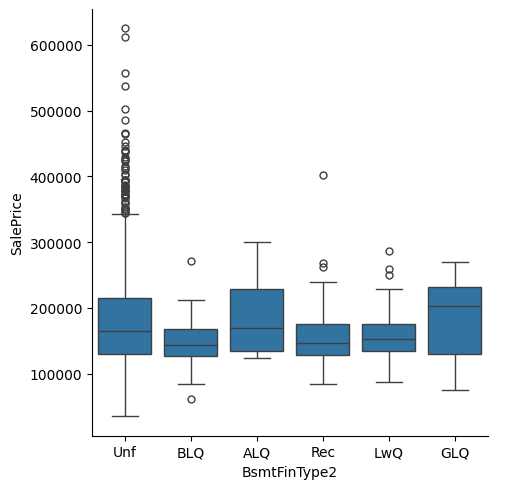

In [245]:
sns.catplot(train_df, x='BsmtFinType2',y='SalePrice',kind='box')

In [241]:
train_df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [15]:
train_df['GarageCond'].fillna('No',inplace=True)
test_df['GarageCond'].fillna('No',inplace=True)

/tmp/ipykernel_965/1859802868.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageCond'].fillna('No',inplace=True)
/tmp/ipykernel_965/1859802868.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

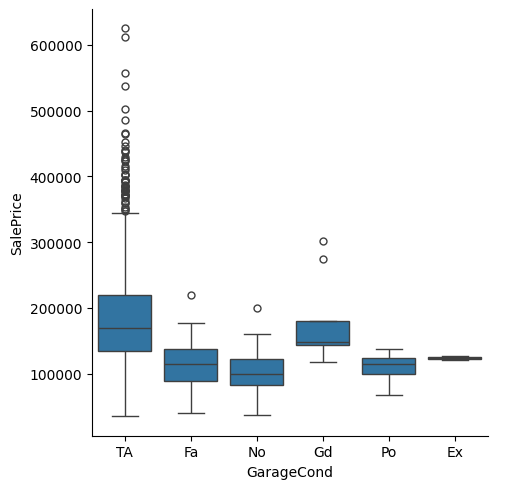

In [246]:
sns.catplot(train_df, x='GarageCond',y='SalePrice',kind='box')

In [248]:
train_df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [16]:
train_df['GarageType'].fillna('No',inplace=True)
test_df['GarageType'].fillna('No',inplace=True)

/tmp/ipykernel_965/2396956490.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageType'].fillna('No',inplace=True)
/tmp/ipykernel_965/2396956490.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

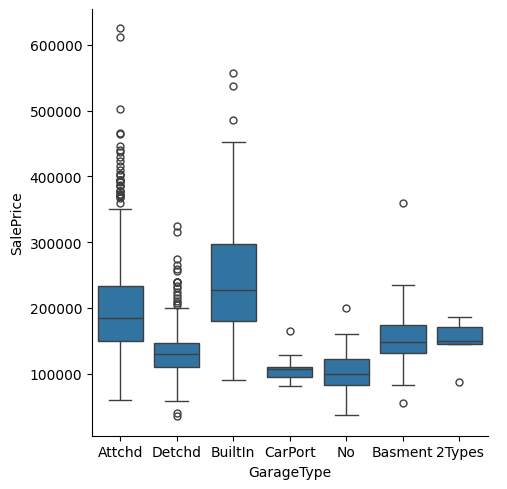

In [250]:
sns.catplot(train_df, x='GarageType',y='SalePrice',kind='box')

In [251]:
train_df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [17]:
train_df['GarageFinish'].fillna('No',inplace=True)
test_df['GarageFinish'].fillna('No',inplace=True)

/tmp/ipykernel_965/1995105470.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageFinish'].fillna('No',inplace=True)
/tmp/ipykernel_965/1995105470.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

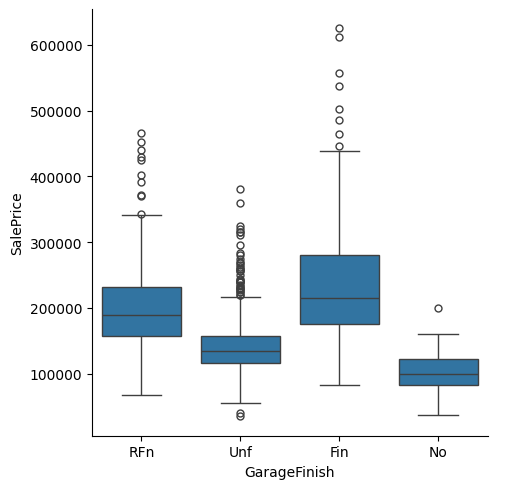

In [253]:
sns.catplot(train_df, x='GarageFinish',y='SalePrice',kind='box')

In [254]:
train_df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Po', 'Ex'], dtype=object)

In [18]:
train_df['GarageQual'].fillna('No',inplace=True)
test_df['GarageQual'].fillna('No',inplace=True)

/tmp/ipykernel_965/4046941688.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageQual'].fillna('No',inplace=True)
/tmp/ipykernel_965/4046941688.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

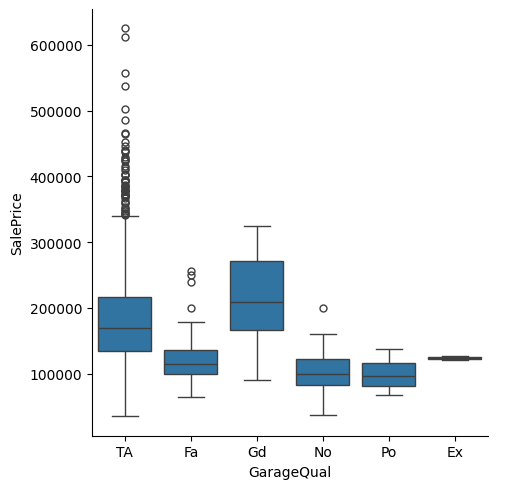

In [256]:
sns.catplot(train_df, x='GarageQual',y='SalePrice',kind='box')

In [19]:
train_df['LotFrontage'].fillna(0,inplace=True)
test_df['LotFrontage'].fillna(0,inplace=True)

/tmp/ipykernel_965/2469193268.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['LotFrontage'].fillna(0,inplace=True)
/tmp/ipykernel_965/2469193268.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [259]:
train_df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [20]:
train_df['FireplaceQu'].fillna('No',inplace=True)
test_df['FireplaceQu'].fillna('No',inplace=True)

/tmp/ipykernel_965/1670826699.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['FireplaceQu'].fillna('No',inplace=True)
/tmp/ipykernel_965/1670826699.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

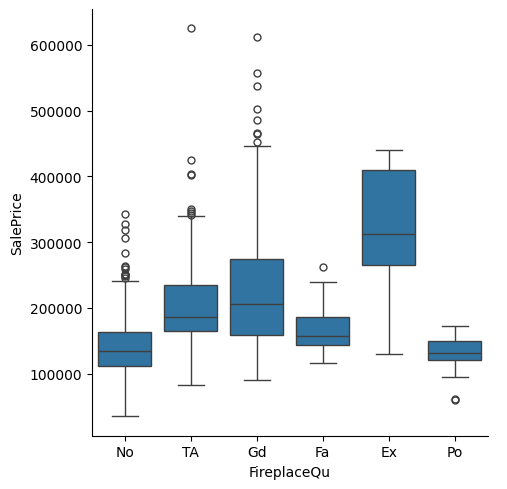

In [261]:
sns.catplot(train_df, x='FireplaceQu',y='SalePrice',kind='box')

In [262]:
train_df['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [21]:
train_df['MasVnrType'].fillna('No',inplace=True)
test_df['MasVnrType'].fillna('No',inplace=True)

/tmp/ipykernel_965/3372288915.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrType'].fillna('No',inplace=True)
/tmp/ipykernel_965/3372288915.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

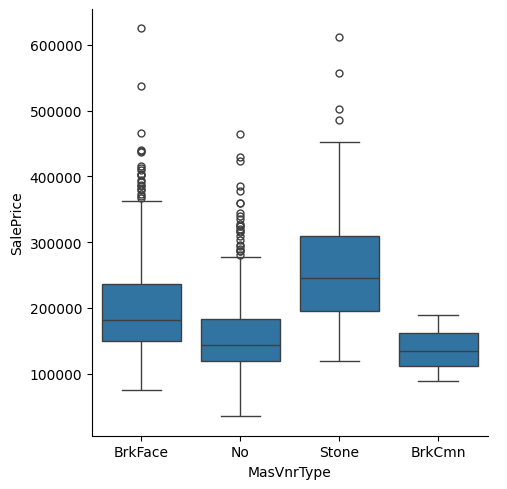

In [264]:
sns.catplot(train_df, x='MasVnrType',y='SalePrice',kind='box')

In [265]:
train_df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [22]:
train_df['Fence'].fillna('No',inplace=True)
test_df['Fence'].fillna('No',inplace=True)

/tmp/ipykernel_965/4003207468.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Fence'].fillna('No',inplace=True)
/tmp/ipykernel_965/4003207468.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

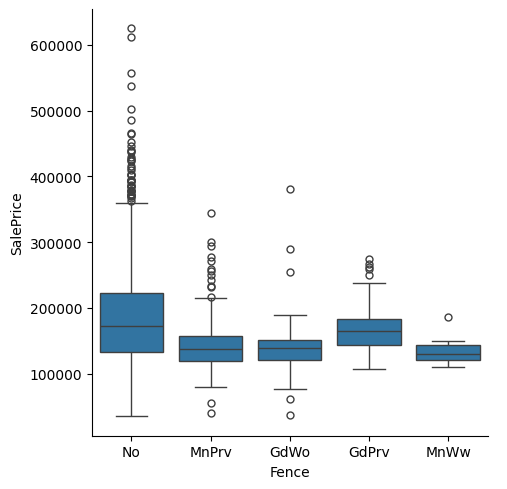

In [267]:
sns.catplot(train_df, x='Fence',y='SalePrice',kind='box')

In [268]:
train_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [23]:
train_df['Alley'].fillna('No',inplace=True)
test_df['Alley'].fillna('No',inplace=True)

/tmp/ipykernel_965/821176631.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Alley'].fillna('No',inplace=True)
/tmp/ipykernel_965/821176631.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

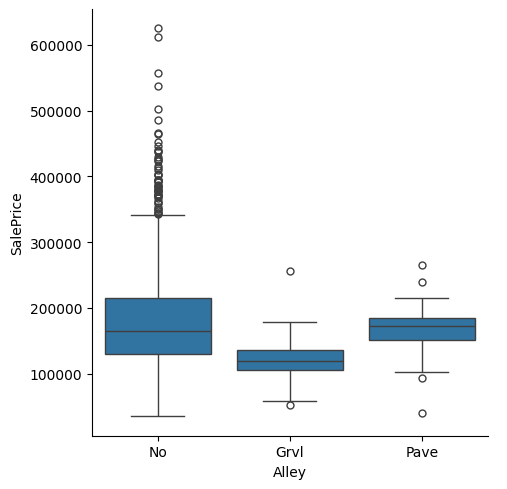

In [270]:
sns.catplot(train_df, x='Alley',y='SalePrice',kind='box')

In [24]:
train_df = train_df.drop(columns=['3SsnPorch','LowQualFinSF','PoolArea','MiscVal','PoolQC','MiscFeature','GarageYrBlt','Alley','Fence','BsmtFinType2'])
test_df = test_df.drop(columns=['3SsnPorch','LowQualFinSF','PoolArea','MiscVal','PoolQC','MiscFeature','GarageYrBlt','Alley','Fence','BsmtFinType2'])

# Feature Engineering

In [25]:
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['HouseAge'] = test_df['YrSold'] - test_df['YearBuilt']

In [26]:
train_df['TotalArea'] = train_df['TotalBsmtSF'] + train_df['GrLivArea']
test_df['TotalArea'] = test_df['TotalBsmtSF'] + test_df['GrLivArea']

In [27]:
train_df['RemodAge'] = train_df['YrSold'] - train_df['YearRemodAdd']
test_df['RemodAge'] = test_df['YrSold'] - test_df['YearRemodAdd']

In [28]:
train_df['TotalBath'] = train_df['BsmtFullBath'] + 0.5 * train_df['BsmtHalfBath'] + train_df['FullBath'] + 0.5 * train_df['HalfBath']
test_df['TotalBath'] = test_df['BsmtFullBath'] + 0.5 * test_df['BsmtHalfBath'] + test_df['FullBath'] + 0.5 * test_df['HalfBath']

In [29]:
train_df['TotalSF'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['BsmtFinSF1'] + train_df['BsmtFinSF2'] + train_df['BsmtUnfSF']
test_df['TotalSF'] = test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df['BsmtFinSF1'] + test_df['BsmtFinSF2'] + test_df['BsmtUnfSF']

In [30]:
train_df['TotaPorch'] = train_df['OpenPorchSF'] + train_df['EnclosedPorch'] + train_df['ScreenPorch'] + train_df['WoodDeckSF']
test_df['TotaPorch'] = test_df['OpenPorchSF'] + test_df['EnclosedPorch'] + test_df['ScreenPorch'] + test_df['WoodDeckSF']

In [31]:
train_df =train_df.drop(columns=['Id','YrSold','YearBuilt','YearRemodAdd','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','OpenPorchSF','EnclosedPorch','ScreenPorch','WoodDeckSF'])
test_df =test_df.drop(columns=['Id','YrSold','YearBuilt','YearRemodAdd','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','OpenPorchSF','EnclosedPorch','ScreenPorch','WoodDeckSF'])

<Axes: >

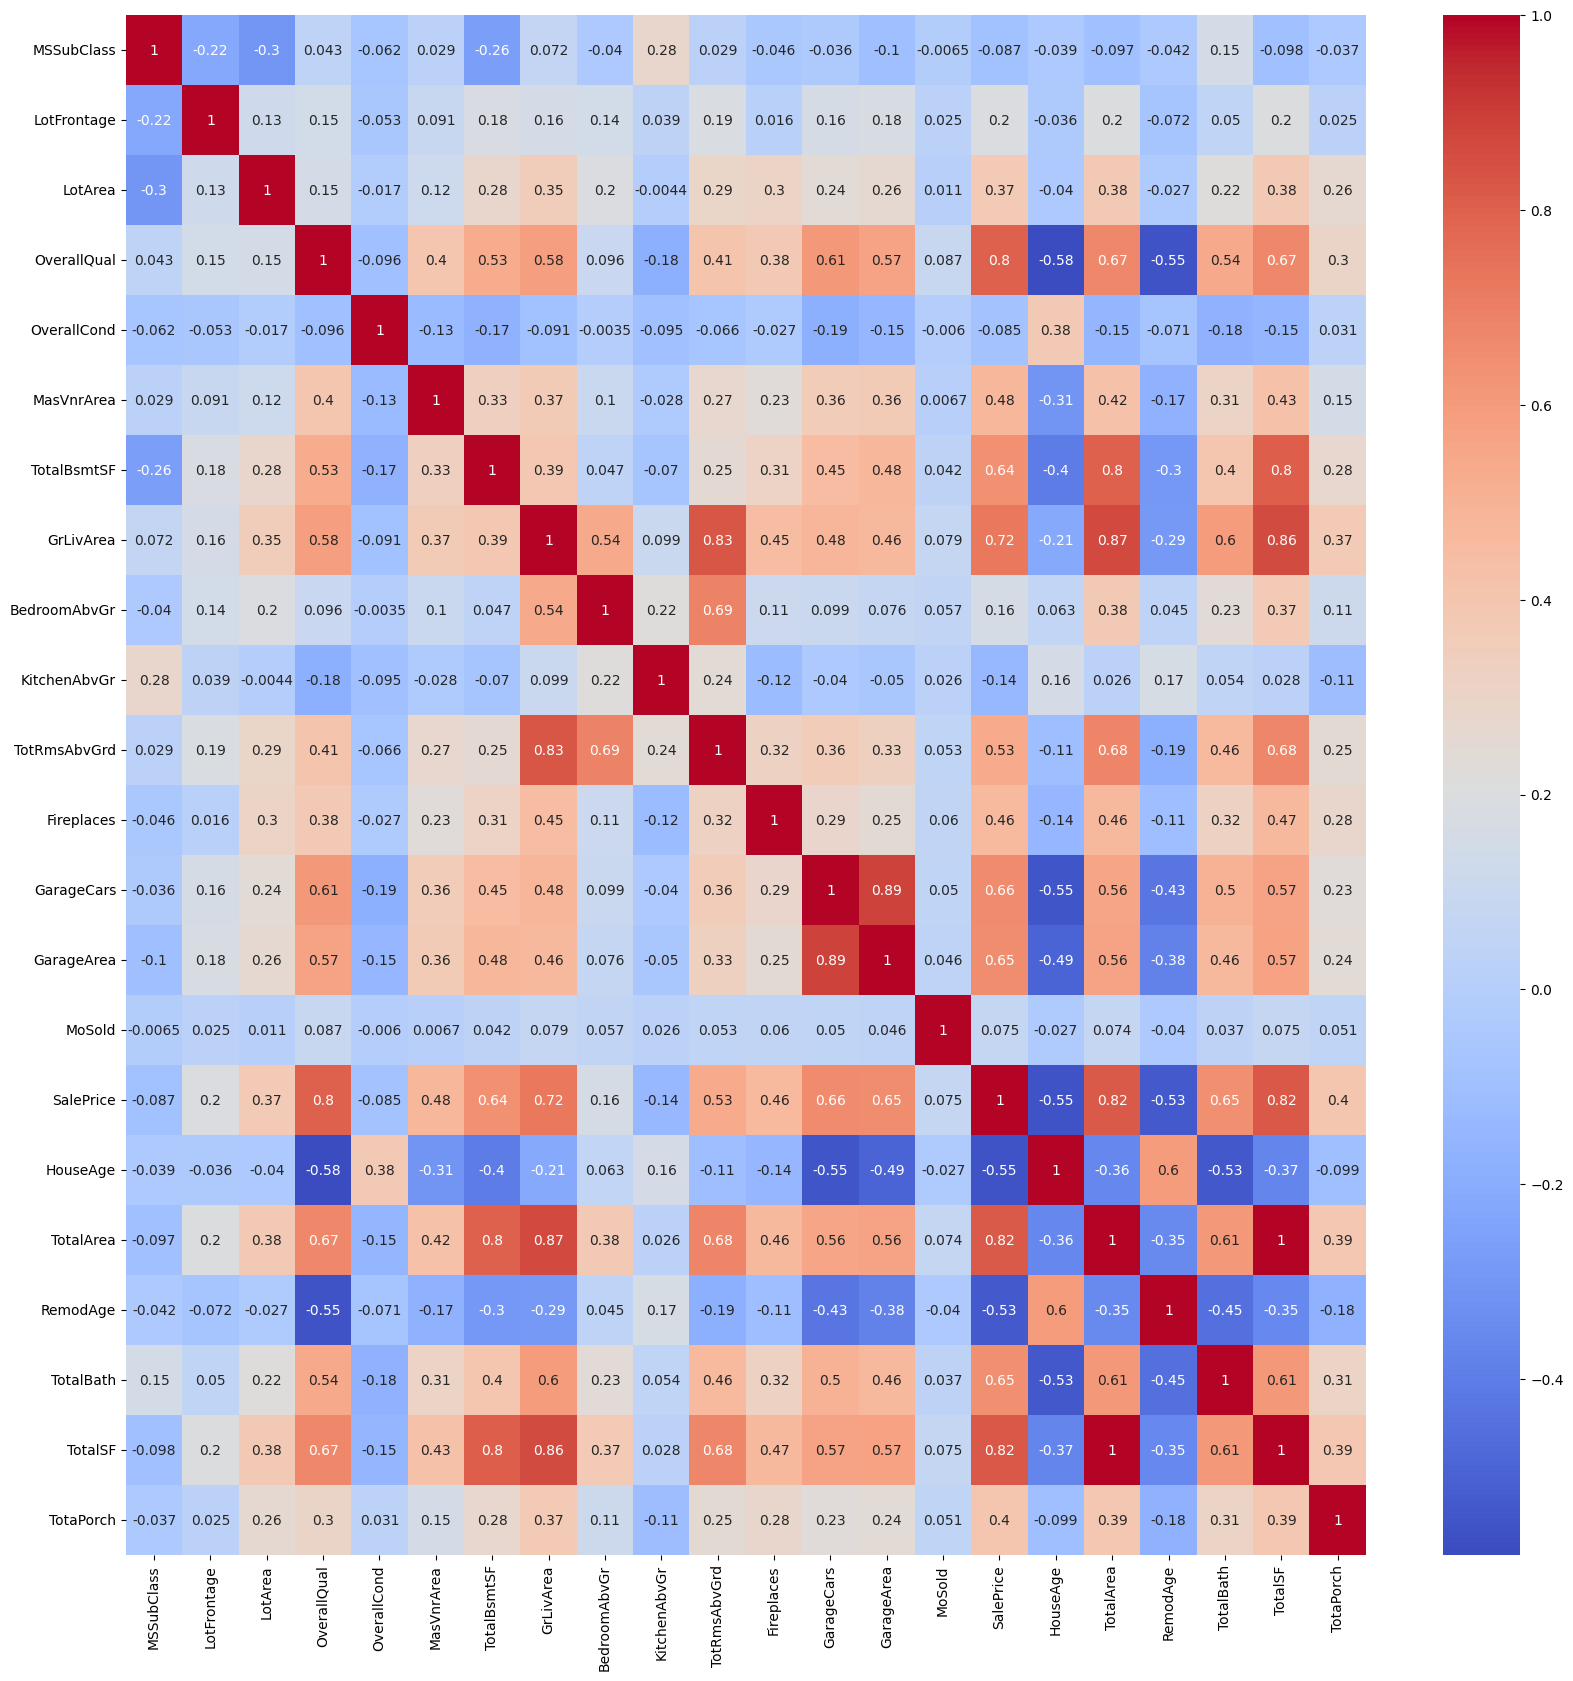

In [32]:
correlation = train_df.corr(numeric_only=True)
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True,cmap='coolwarm')

# Preprocessing

In [40]:
train_df.select_dtypes('object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [41]:
train_df.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'MoSold', 'SalePrice', 'HouseAge', 'TotalArea',
       'RemodAge', 'TotalBath', 'TotalSF', 'TotaPorch'],
      dtype='object')

In [44]:
ode_columns = ['LotShape','Utilities','LandContour','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond']

In [45]:
ohe_columns = ['MSZoning','Street','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','GarageType','PavedDrive','SaleType','SaleCondition']

In [46]:
num_cols = train_df.select_dtypes(exclude='object').columns
num_cols = num_cols.drop('SalePrice')

In [93]:
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'MoSold', 'HouseAge', 'TotalArea', 'RemodAge',
       'TotalBath', 'TotalSF', 'TotaPorch'],
      dtype='object')

<Axes: >

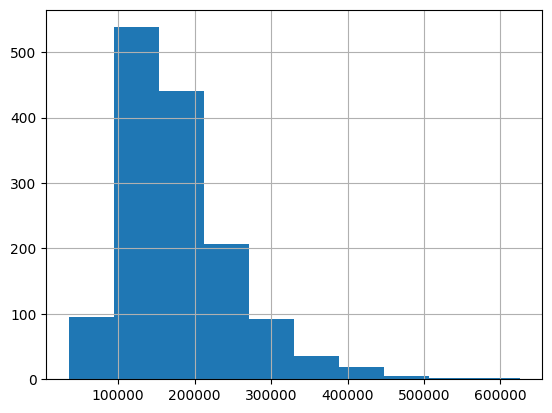

In [51]:
train_df['SalePrice'].hist()

In [52]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

<Axes: >

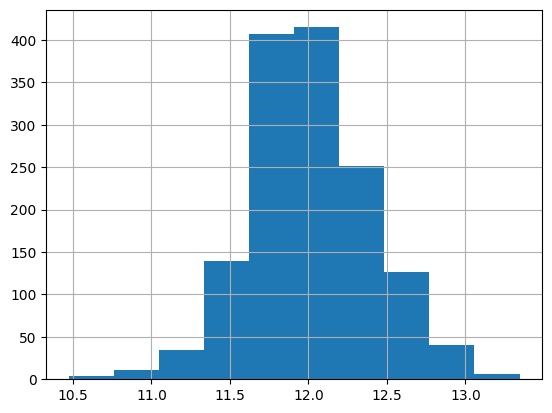

In [53]:
train_df['SalePrice'].hist()

In [60]:
ode_pipeline = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ode',OrdinalEncoder(handle_unknown=
                          'use_encoded_value',unknown_value=-1))
])

In [59]:
ohe_pipeline = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

In [61]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [63]:
cols_trans = ColumnTransformer(transformers=[
    ('ode', ode_pipeline, ode_columns),
    ('ohe',ohe_pipeline, ohe_columns),
    ('nums',num_pipeline, num_cols)
], remainder='passthrough', n_jobs=-1)

In [69]:
pipeline = Pipeline(steps=[
    ('preprocessing', cols_trans)
])

In [83]:
x = train_df.drop(columns=['SalePrice'],axis=1)
y = train_df['SalePrice']

In [84]:
x_preprocessed = pipeline.fit_transform(x)

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x_preprocessed,y, test_size=0.2,random_state=7)

# Model building

In [80]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [96]:
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_pred, y_test)
print(f'mse = {mse}\nrmse = {np.sqrt(mse)}')

mse = 1.4832011960643752e+19
rmse = 3851235121.443996
